<a href="https://colab.research.google.com/github/FahimeMirveisi/PyLearn7_MachineLearning_Projects/blob/master/classcode50(House_Prices).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
print(data.isnull().sum().sort_values())

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64


In [ ]:
X = data[["YearBuilt", "GarageArea", "GarageCars", "PoolArea", "FullBath", "1stFlrSF", "2ndFlrSF", "YearRemodAdd", "TotalBsmtSF","GrLivArea"]].values
Y = data[["SalePrice"]].values

In [ ]:
print('Type X:', type(X))
print('Type Y:', type(Y))

Type X: <class 'numpy.ndarray'>
Type Y: <class 'numpy.ndarray'>


In [ ]:
print('First sample feature values:',X[1])

First sample feature values: [1976  460    2    0    2 1262    0 1976 1262 1262]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50, test_size=0.2)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1168, 10), (292, 10), (1168, 1), (292, 1))

In [ ]:
X_train.dtype, X_test.dtype, Y_train.dtype, Y_test.dtype

(dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'))

## Normalize the data

In [ ]:
#X_train.min(axis=0), X_train.max(axis=0)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#my_mmscaler = MinMaxScaler()
#my_mmscaler.fit(X_train)
#X_train =  my_mmscaler.transform(X_train)

In [ ]:
#X_train.min(axis=0), X_train.max(axis=0)

In [ ]:
#X_test = my_mmscaler.transform(X_test)
#X_test.min(axis=0), X_test.max(axis=0)

In [ ]:
#Y_test.min(), Y_test.max(), Y_train.min(), Y_train.max()

In [ ]:
#Y_train = Y_train / 755000
#Y_test = Y_test / 475000

In [ ]:
#Y_test.min(), Y_test.max(), Y_train.min(), Y_train.max()

## Model

In [ ]:
from keras.layers.serialization import activation
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [ ]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_logarithmic_error',
    metrics='RootMeanSquaredError')

In [ ]:
output = model.fit(X_train, Y_train, epochs=40, validation_data=(X_test, Y_test), validation_split=0.2)

Epoch 1/40
37/37 [==============================] - 4s 18ms/step - loss: 11.6168 - root_mean_squared_error: 174237.2188 - val_loss: 0.5339 - val_root_mean_squared_error: 117588.9922
Epoch 2/40
37/37 [==============================] - 0s 11ms/step - loss: 0.1478 - root_mean_squared_error: 72599.0469 - val_loss: 0.0910 - val_root_mean_squared_error: 56775.7773
Epoch 3/40
37/37 [==============================] - 0s 11ms/step - loss: 0.0750 - root_mean_squared_error: 59257.0391 - val_loss: 0.0830 - val_root_mean_squared_error: 59671.2070
Epoch 4/40
37/37 [==============================] - 1s 15ms/step - loss: 0.0731 - root_mean_squared_error: 58924.2188 - val_loss: 0.0821 - val_root_mean_squared_error: 57817.8047
Epoch 5/40
37/37 [==============================] - 0s 7ms/step - loss: 0.0723 - root_mean_squared_error: 58550.7852 - val_loss: 0.0804 - val_root_mean_squared_error: 57447.4062
Epoch 6/40
37/37 [==============================] - 0s 7ms/step - loss: 0.0711 - root_mean_squared_erro

In [ ]:
#model_history = pd.DataFrame(model.history.history)
#model_history.plot()

[]

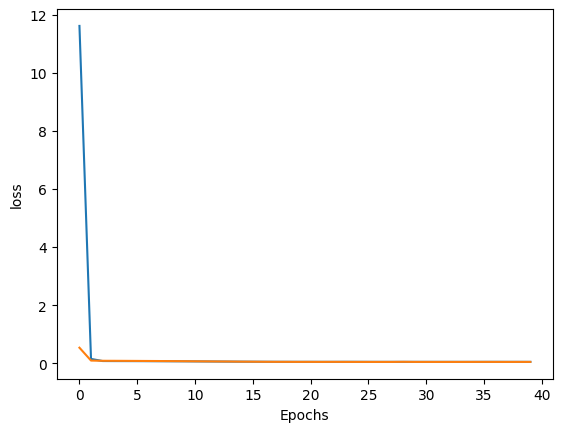

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot()

In [ ]:
data_test = pd.read_csv("test.csv")
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
model.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 8ms/step - loss: 0.0445 - root_mean_squared_error: 41501.8711


[0.04453205317258835, 41501.87109375]

In [ ]:
my_house = np.array([[90, 12, 0, 1, 110, 0, 100, 8, 40, 8]])
model.predict(my_house)

1/1 [==============================] - 0s 206ms/step


array([[15542.056]], dtype=float32)

In [ ]:
model_predictions = model.predict(X_test)
model_predictions[20], Y_test[20]

10/10 [==============================] - 0s 6ms/step


(array([200354.39], dtype=float32), array([260000]))

In [ ]:
errors = 0
for index in range(len(Y_test)):
  if abs(model_predictions[index] - Y_test[index]) > 50000:
    errors += 1

print(1 - (errors / len(Y_test)))

0.863013698630137


In [ ]:
#model.save("sajjad_model.h5")
#model.save("/content/drive/MyDrive/sajjad_model.h5")
tf.keras.models.save_model(model, 'my_model.h5')

In [ ]:
#model = tf.keras.models.load_model("/content/drive/MyDrive/sajjad_model.h5")
model = tf.keras.models.load_model("my_model.h5")